In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches
from pathlib import Path

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES, FREQ_GROUPS, DC_COLOR_MAPPINGS
from cli import get_file_paths

import bout_clustering as bt_clustering
import bout_plotting as bt_plt
import subsampling as ss
import data_handling as dh
import plotting
import pipeline

In [4]:
type_key = 'lf_'
site_key = "Carp"
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

In [5]:
pipeline_params = dict()
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = False
pipeline_params["show_PST"] = True
pipeline_params

{'read_csv': False,
 'save_activity_grid': True,
 'save_presence_grid': True,
 'save_dc_night_comparisons': True,
 'save_activity_dc_comparisons': True,
 'save_presence_dc_comparisons': True,
 'show_plots': False,
 'show_PST': True}

In [6]:
data_params = dict()
data_params["site_name"] = SITE_NAMES[site_key]
data_params["site_tag"] = site_key
data_params["type_tag"] = type_key
data_params["freq_tags"] = FREQ_GROUPS[type_key]
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution_in_min'] = '30'
data_params['recording_start'] = '03:00'
data_params['recording_end'] = '13:30'
data_params

{'site_name': 'Carp Pond',
 'site_tag': 'Carp',
 'type_tag': 'lf_',
 'freq_tags': [13000, 43000],
 'cycle_lengths': [1800, 360],
 'percent_ons': [0.1667],
 'dc_tags': ['1800of1800', '300of1800', '60of360'],
 'cur_dc_tag': '1800of1800',
 'resolution_in_min': '30',
 'recording_start': '03:00',
 'recording_end': '13:30'}

In [7]:
file_paths = get_file_paths(data_params)
file_paths

{'raw_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/raw/Carp',
 'SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp',
 'bd2_TYPE_SITE_YEAR': 'bd2__lf_Carp_2022',
 'duty_cycled_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled',
 'dc_dets_TYPE_SITE_summary': 'dc_dets__lf_Carp_summary',
 'dc_bouts_TYPE_SITE_summary': 'dc_bouts__lf_Carp_summary',
 'simulated_schemes_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled/simulated_schemes',
 'figures_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../figures/Carp',
 'activity_det_comparisons_figname': 'activity_det_comparisons_per_dc_LF_Carp',
 'dc_det_comparisons_figname': 'dc_det_comparisons_per_night_LF_Carp',
 'activity_bout_comparisons_figname': 'activity_bout_comparisons_per_dc_LF_Carp',
 'dc_bout_comparisons_figname': 'dc_bout_comparisons_per_night_

In [8]:
activity_dets_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)

In [9]:
activity_bouts_arr = pipeline.run_for_bouts(data_params, pipeline_params, file_paths)

In [10]:
activity_bouts_arr

percentage_time_occupied_by_bouts (1800of1800)  \
Date_and_Time_UTC                                                     
2022-07-13 03:00:00                                        0.000000   
2022-07-13 03:30:00                                        0.000000   
2022-07-13 04:00:00                                        0.000000   
2022-07-13 04:30:00                                        0.780906   
2022-07-13 05:00:00                                        0.835072   
...                                                             ...   
2022-08-25 11:00:00                                        0.438111   
2022-08-25 11:30:00                                        0.000000   
2022-08-25 12:00:00                                        3.928983   
2022-08-25 12:30:00                                        2.394844   
2022-08-25 13:00:00                                        0.000000   

                     percentage_time_occupied_by_bouts (300of1800)  \
Date_and_Time_UTC                                                    
2022-07-13 03:00:00                                       0.000000   
2022-07-13 03:30:00                                       0.000000   
2022-07-13 04:00:00                                       0.000000   
2022-07-13 04:30:00                                       0.000000   
2022-07-13 05:00:00                                       0.000000   
...                                                            ...   
2022-08-25 11:00:00                                       0.345417   
2022-08-25 11:30:00                                       0.000000   
2022-08-25 12:00:00                                       0.041772   
2022-08-25 12:30:00                                       1.466794   
2022-08-25 13:00:00                                       0.000000   

                     percentage_time_occupied_by_bouts (60of360)  
Date_and_Time_UTC                                                 
2022-07-13 03:00:00                                     0.000000  
2022-07-13 03:30:00                                     0.000000  
2022-07-13 04:00:00                                     0.000000  
2022-07-13 04:30:00                                     0.000000  
2022-07-13 05:00:00                                     0.000000  
...                                                          ...  
2022-08-25 11:00:00                                     0.345417  
2022-08-25 11:30:00                                     0.000000  
2022-08-25 12:00:00                                     0.339333  
2022-08-25 12:30:00                                     0.980294  
2022-08-25 13:00:00                                     0.000000  

[924 rows x 3 columns]

In [11]:
data_params["cur_dc_tag"] = "1800of1800"

activity_df = dh.construct_activity_grid_for_bouts(activity_bouts_arr, data_params['cur_dc_tag'])

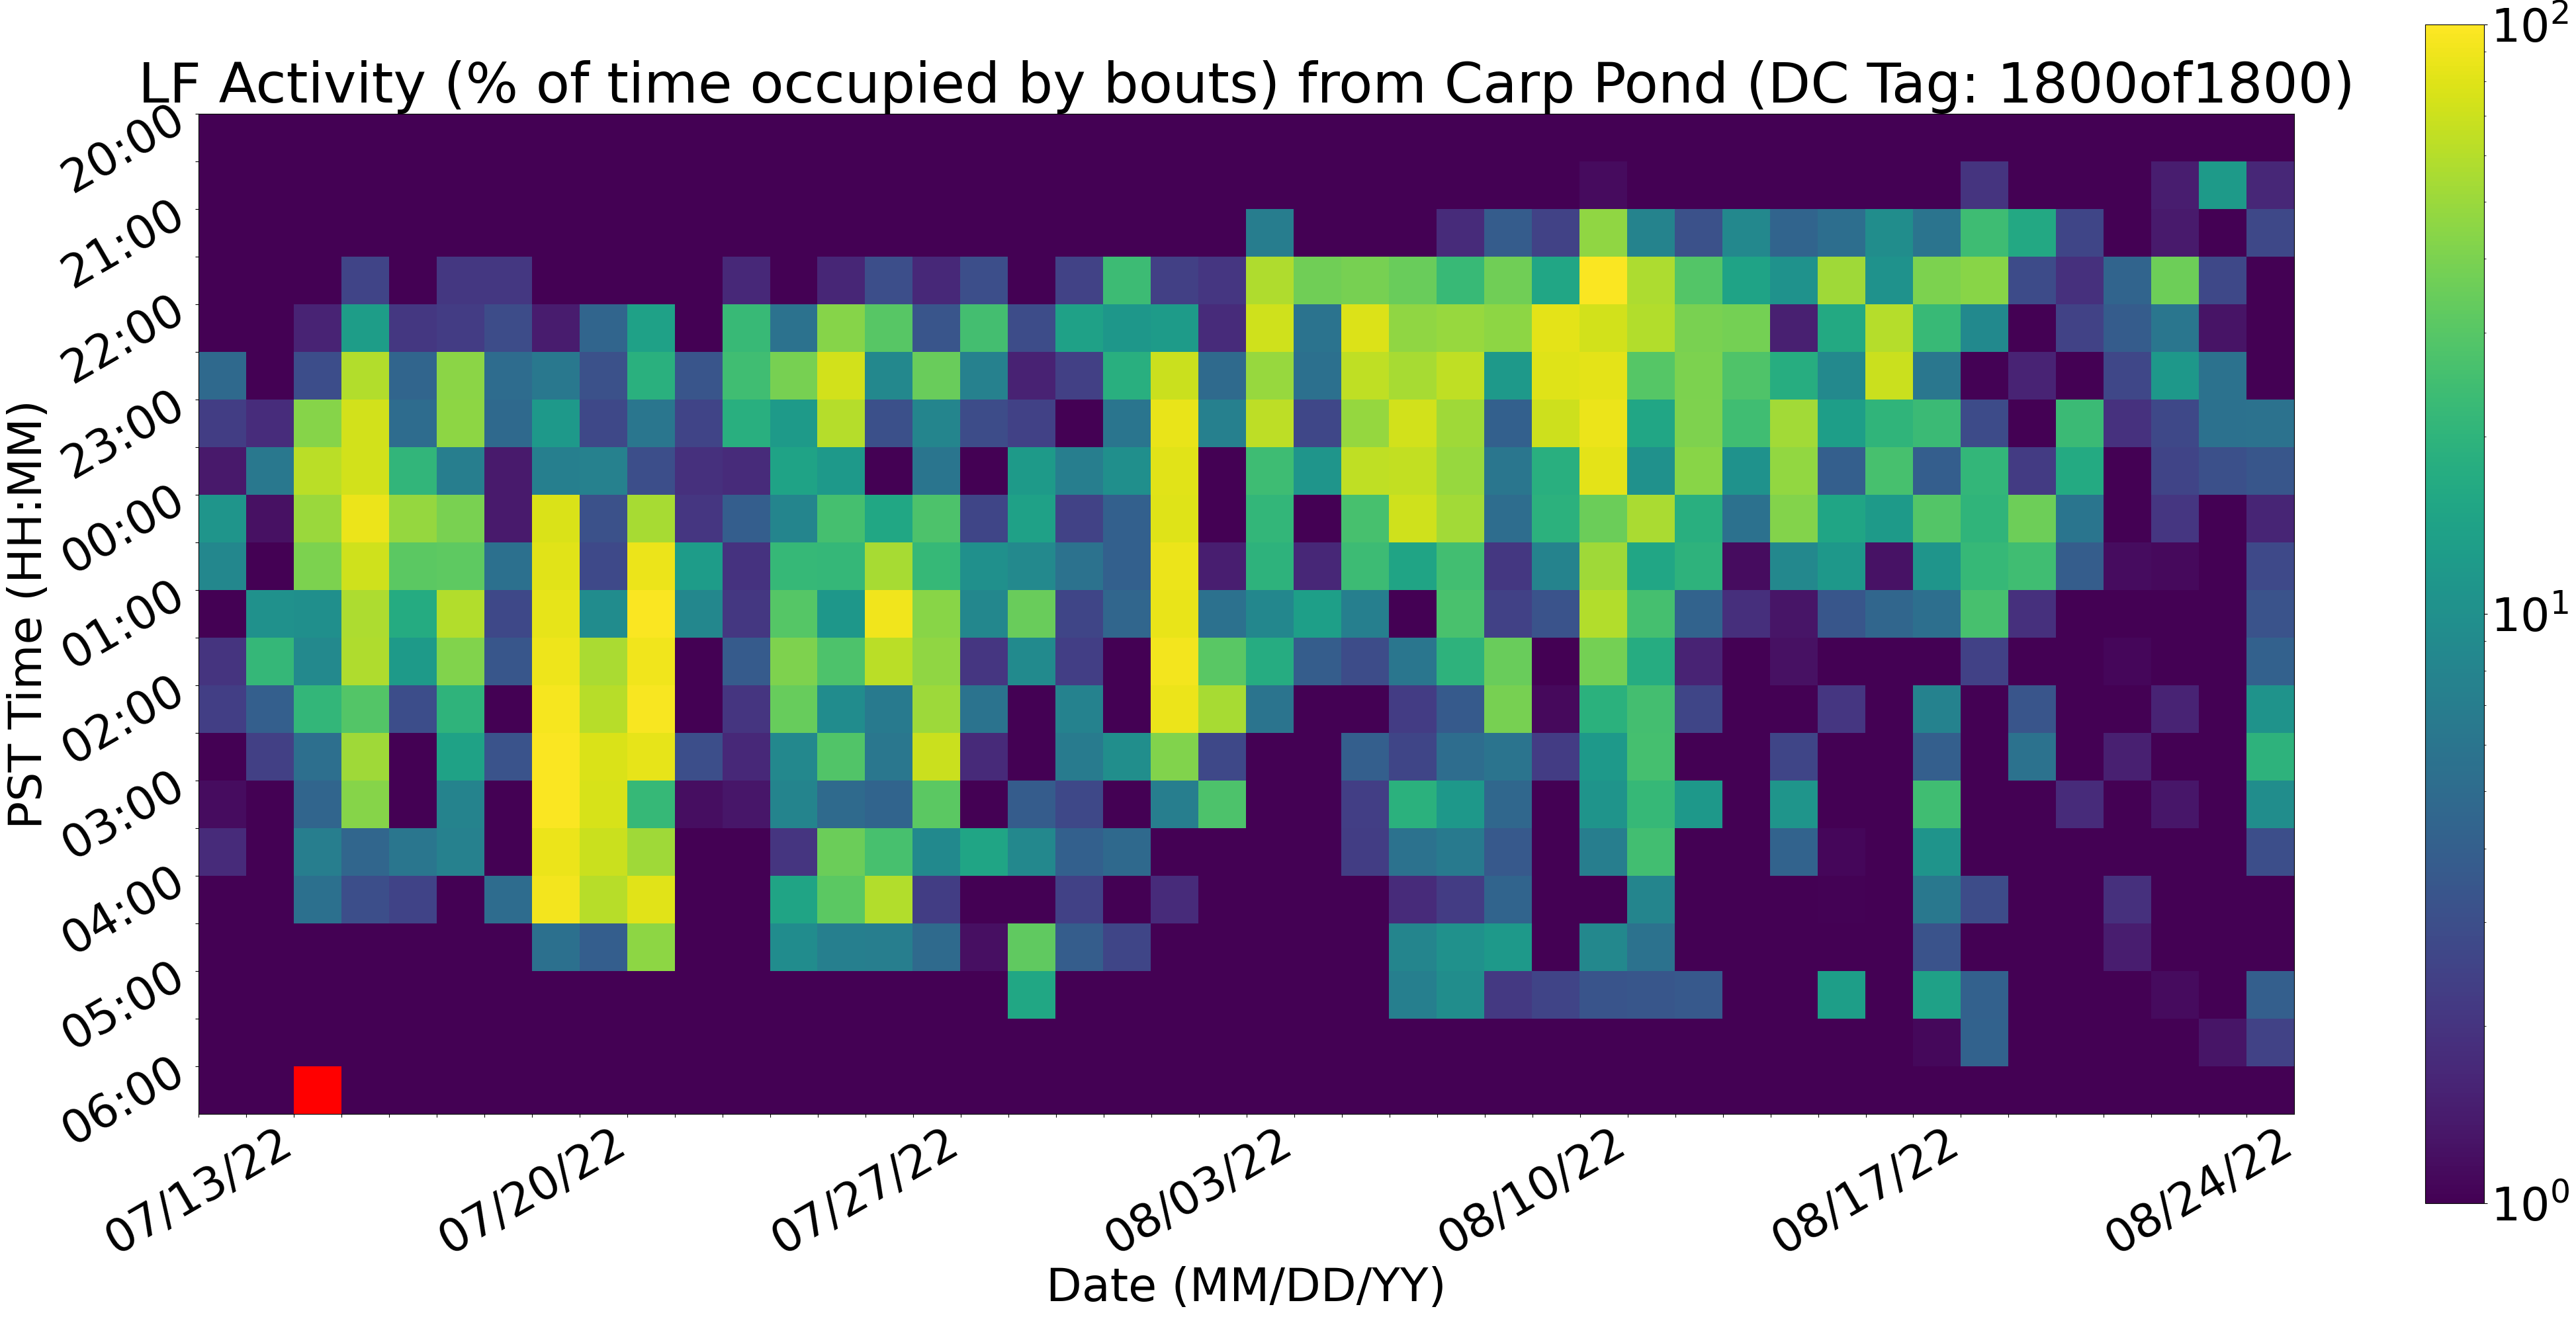

In [12]:
plotting.plot_activity_grid_for_bouts(activity_df, data_params, pipeline_params, file_paths)

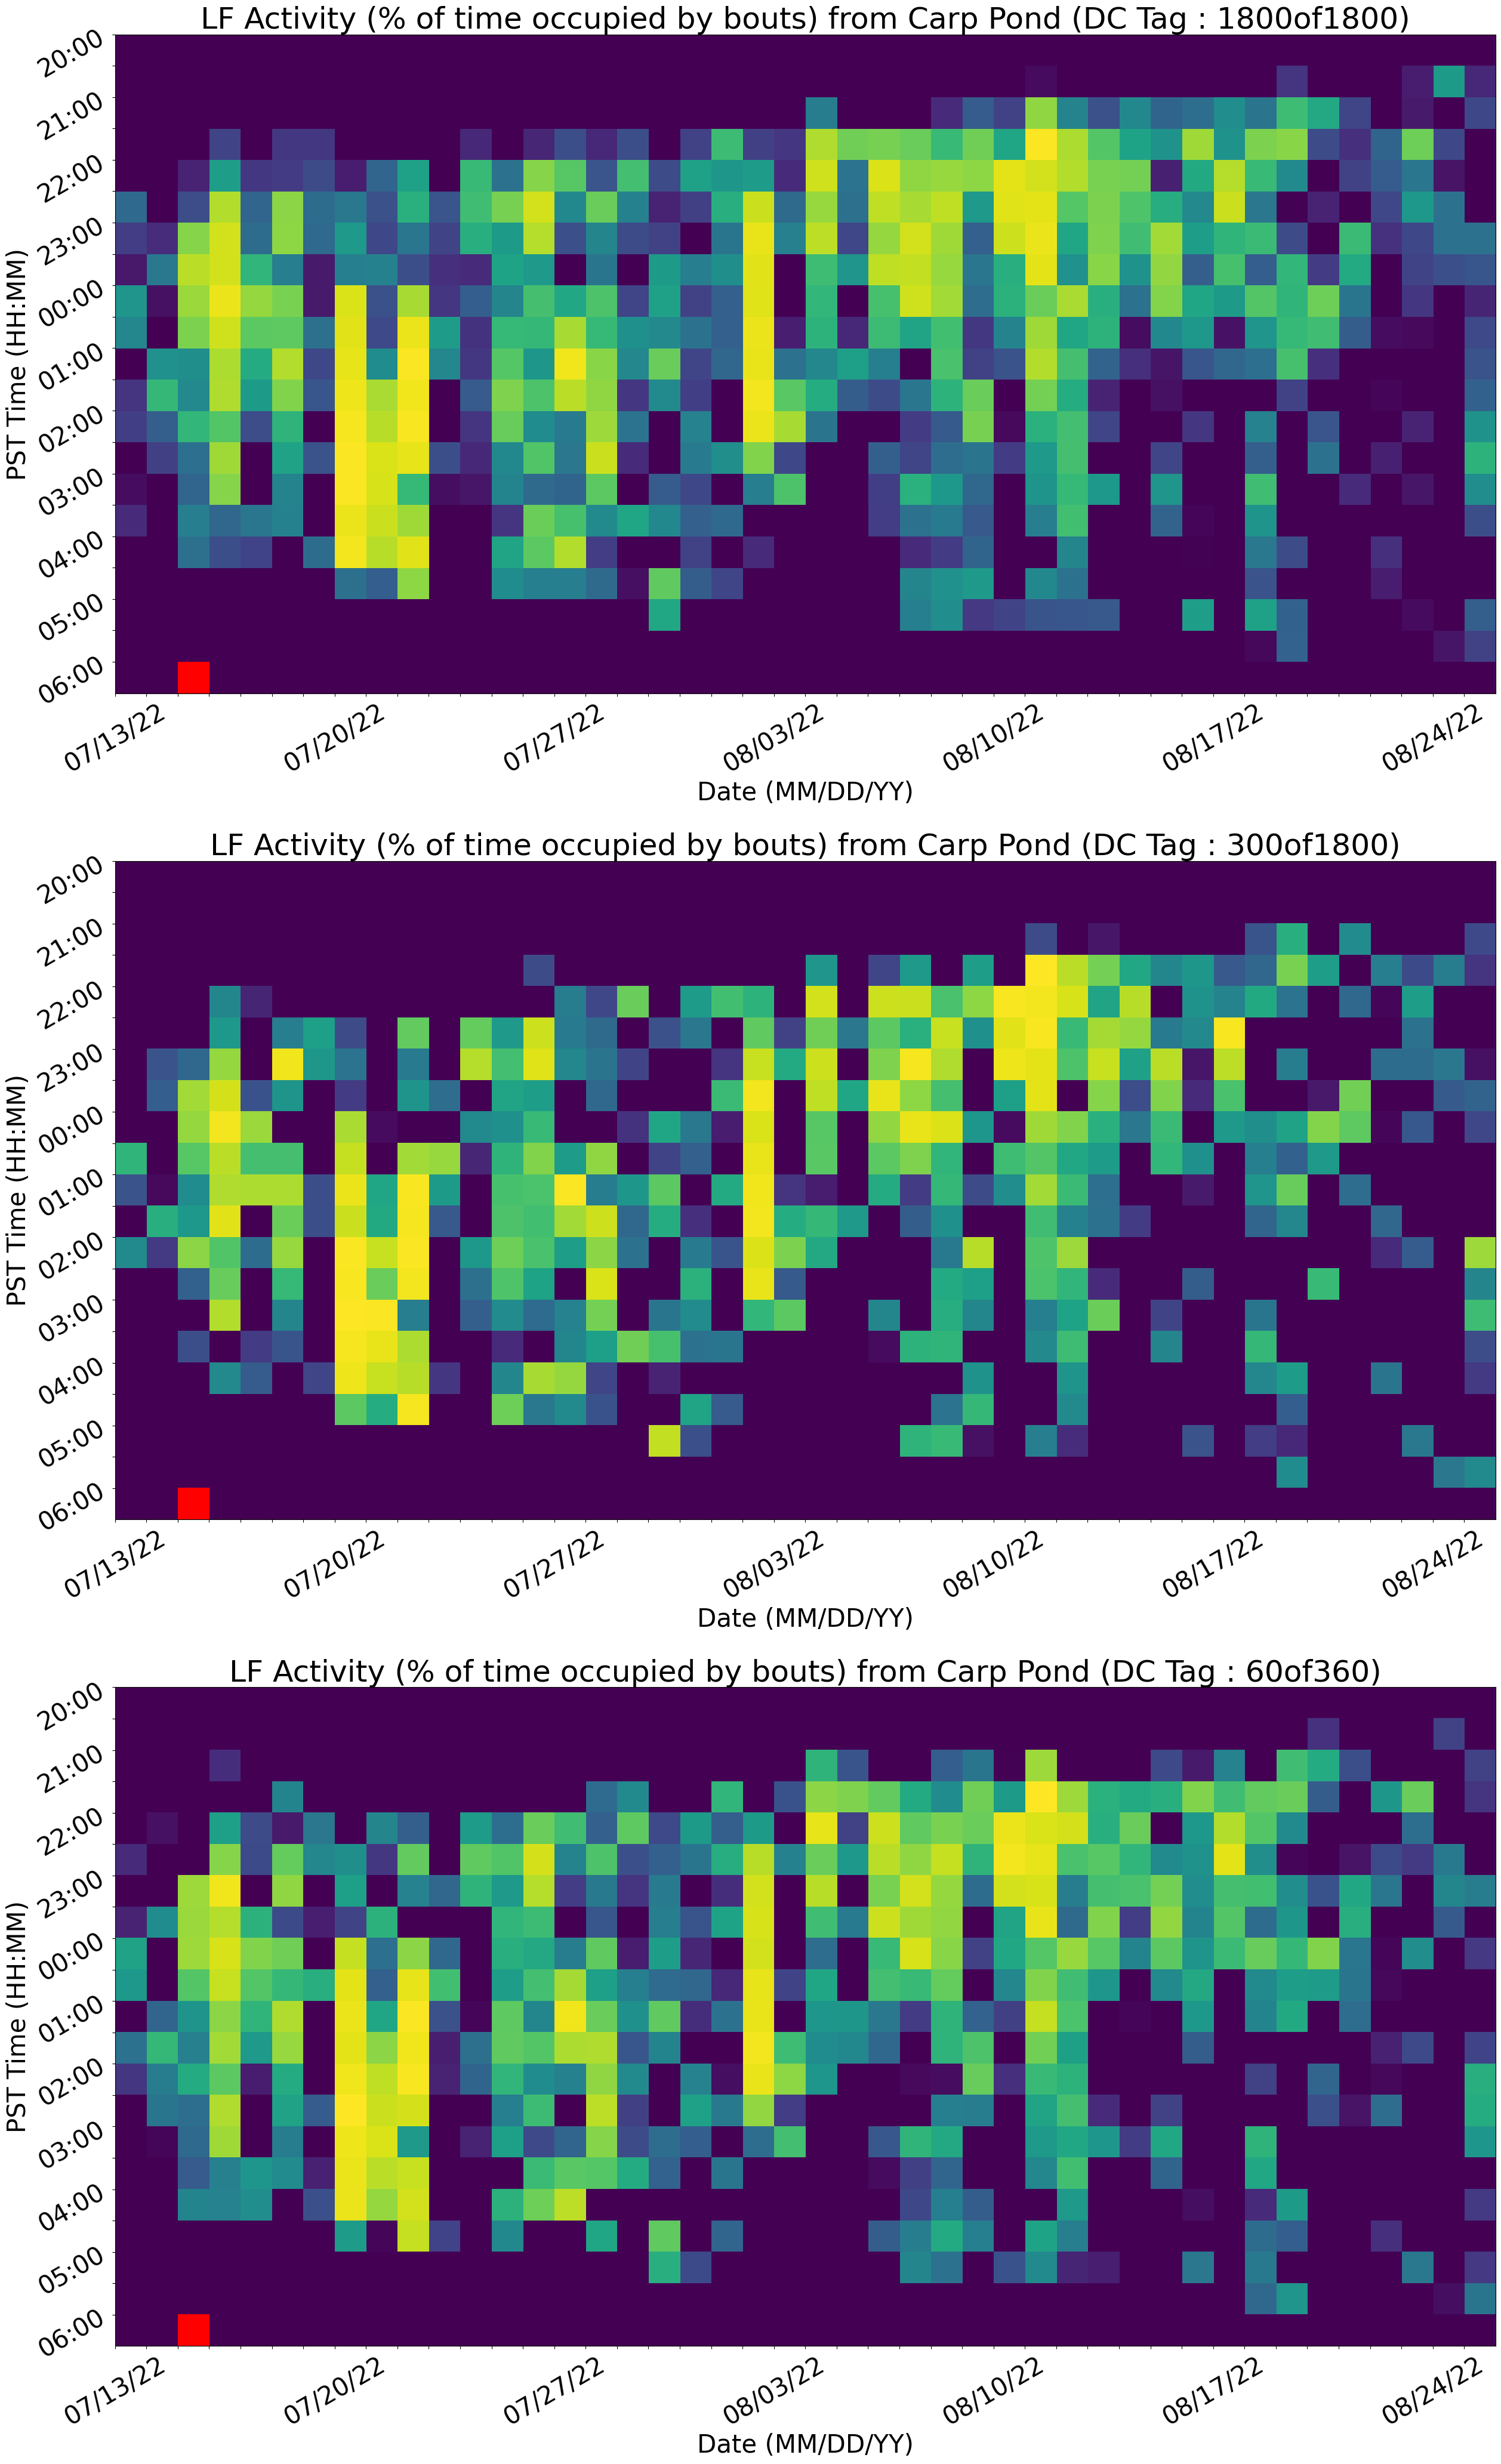

In [13]:
plotting.plot_dc_bout_activity_comparisons_per_scheme(activity_bouts_arr, data_params, pipeline_params, file_paths)

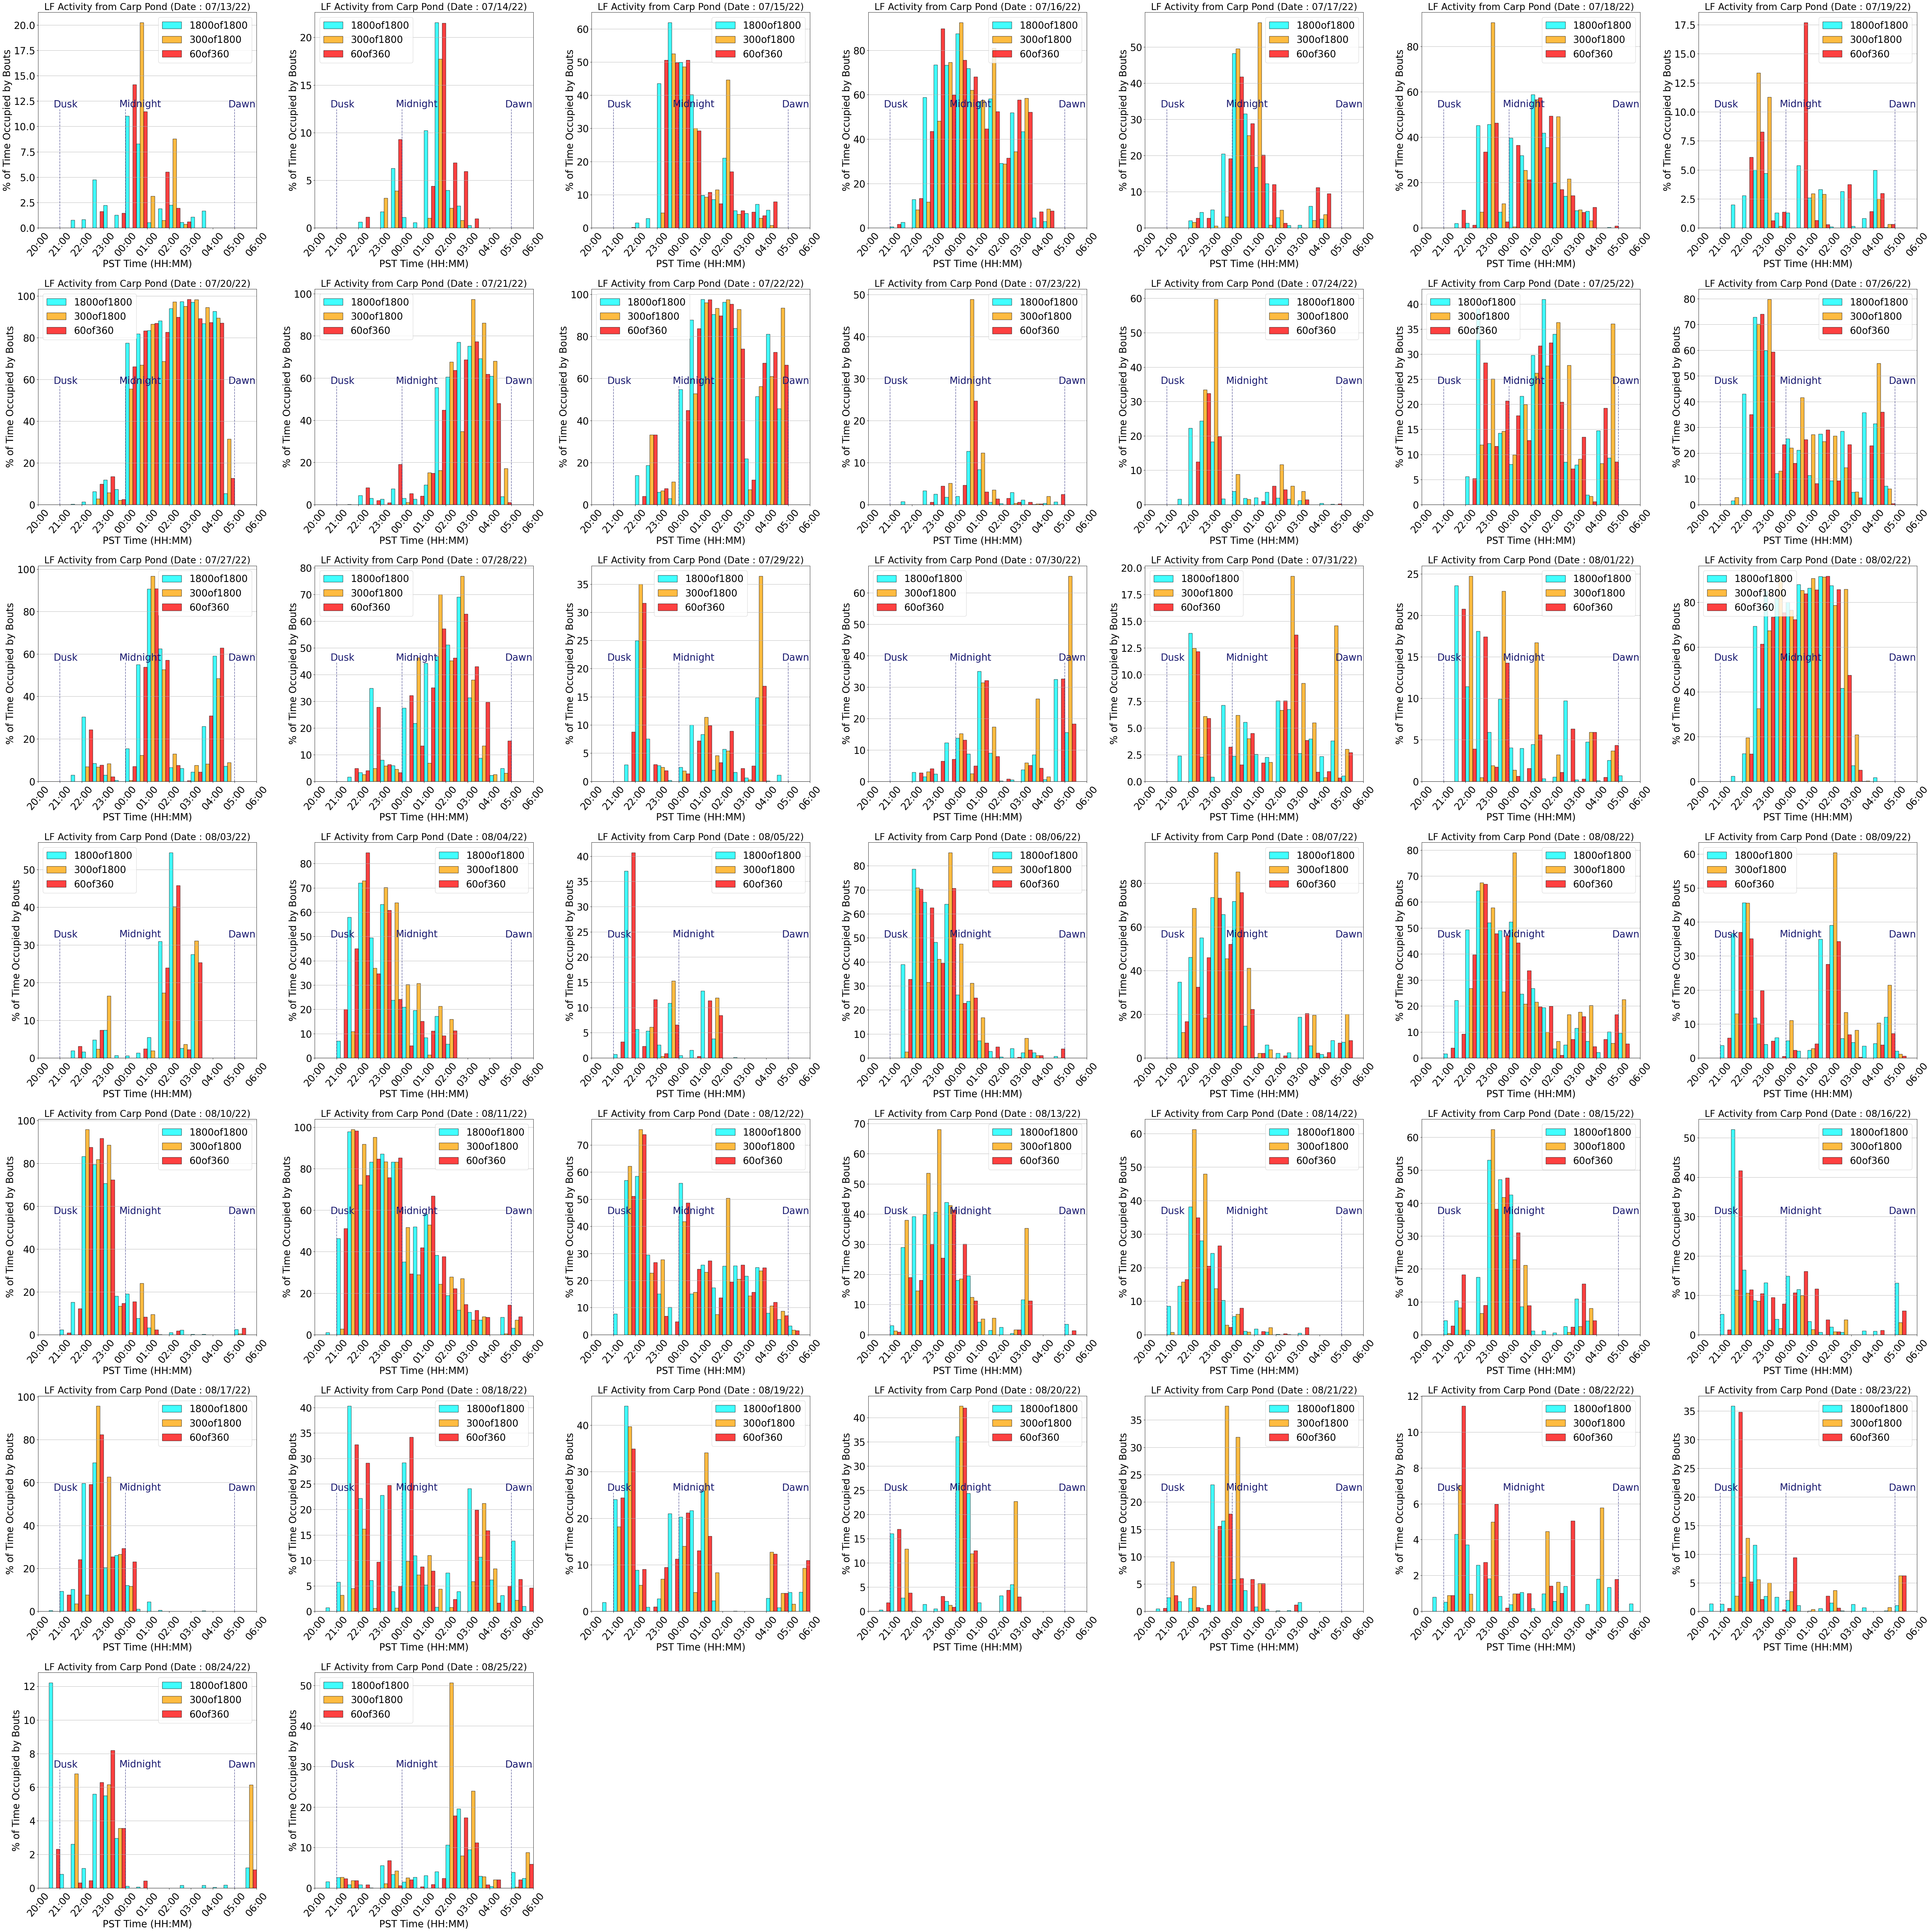

In [14]:
plotting.plot_dc_bouts_comparisons_per_night(activity_bouts_arr, data_params, pipeline_params, file_paths)

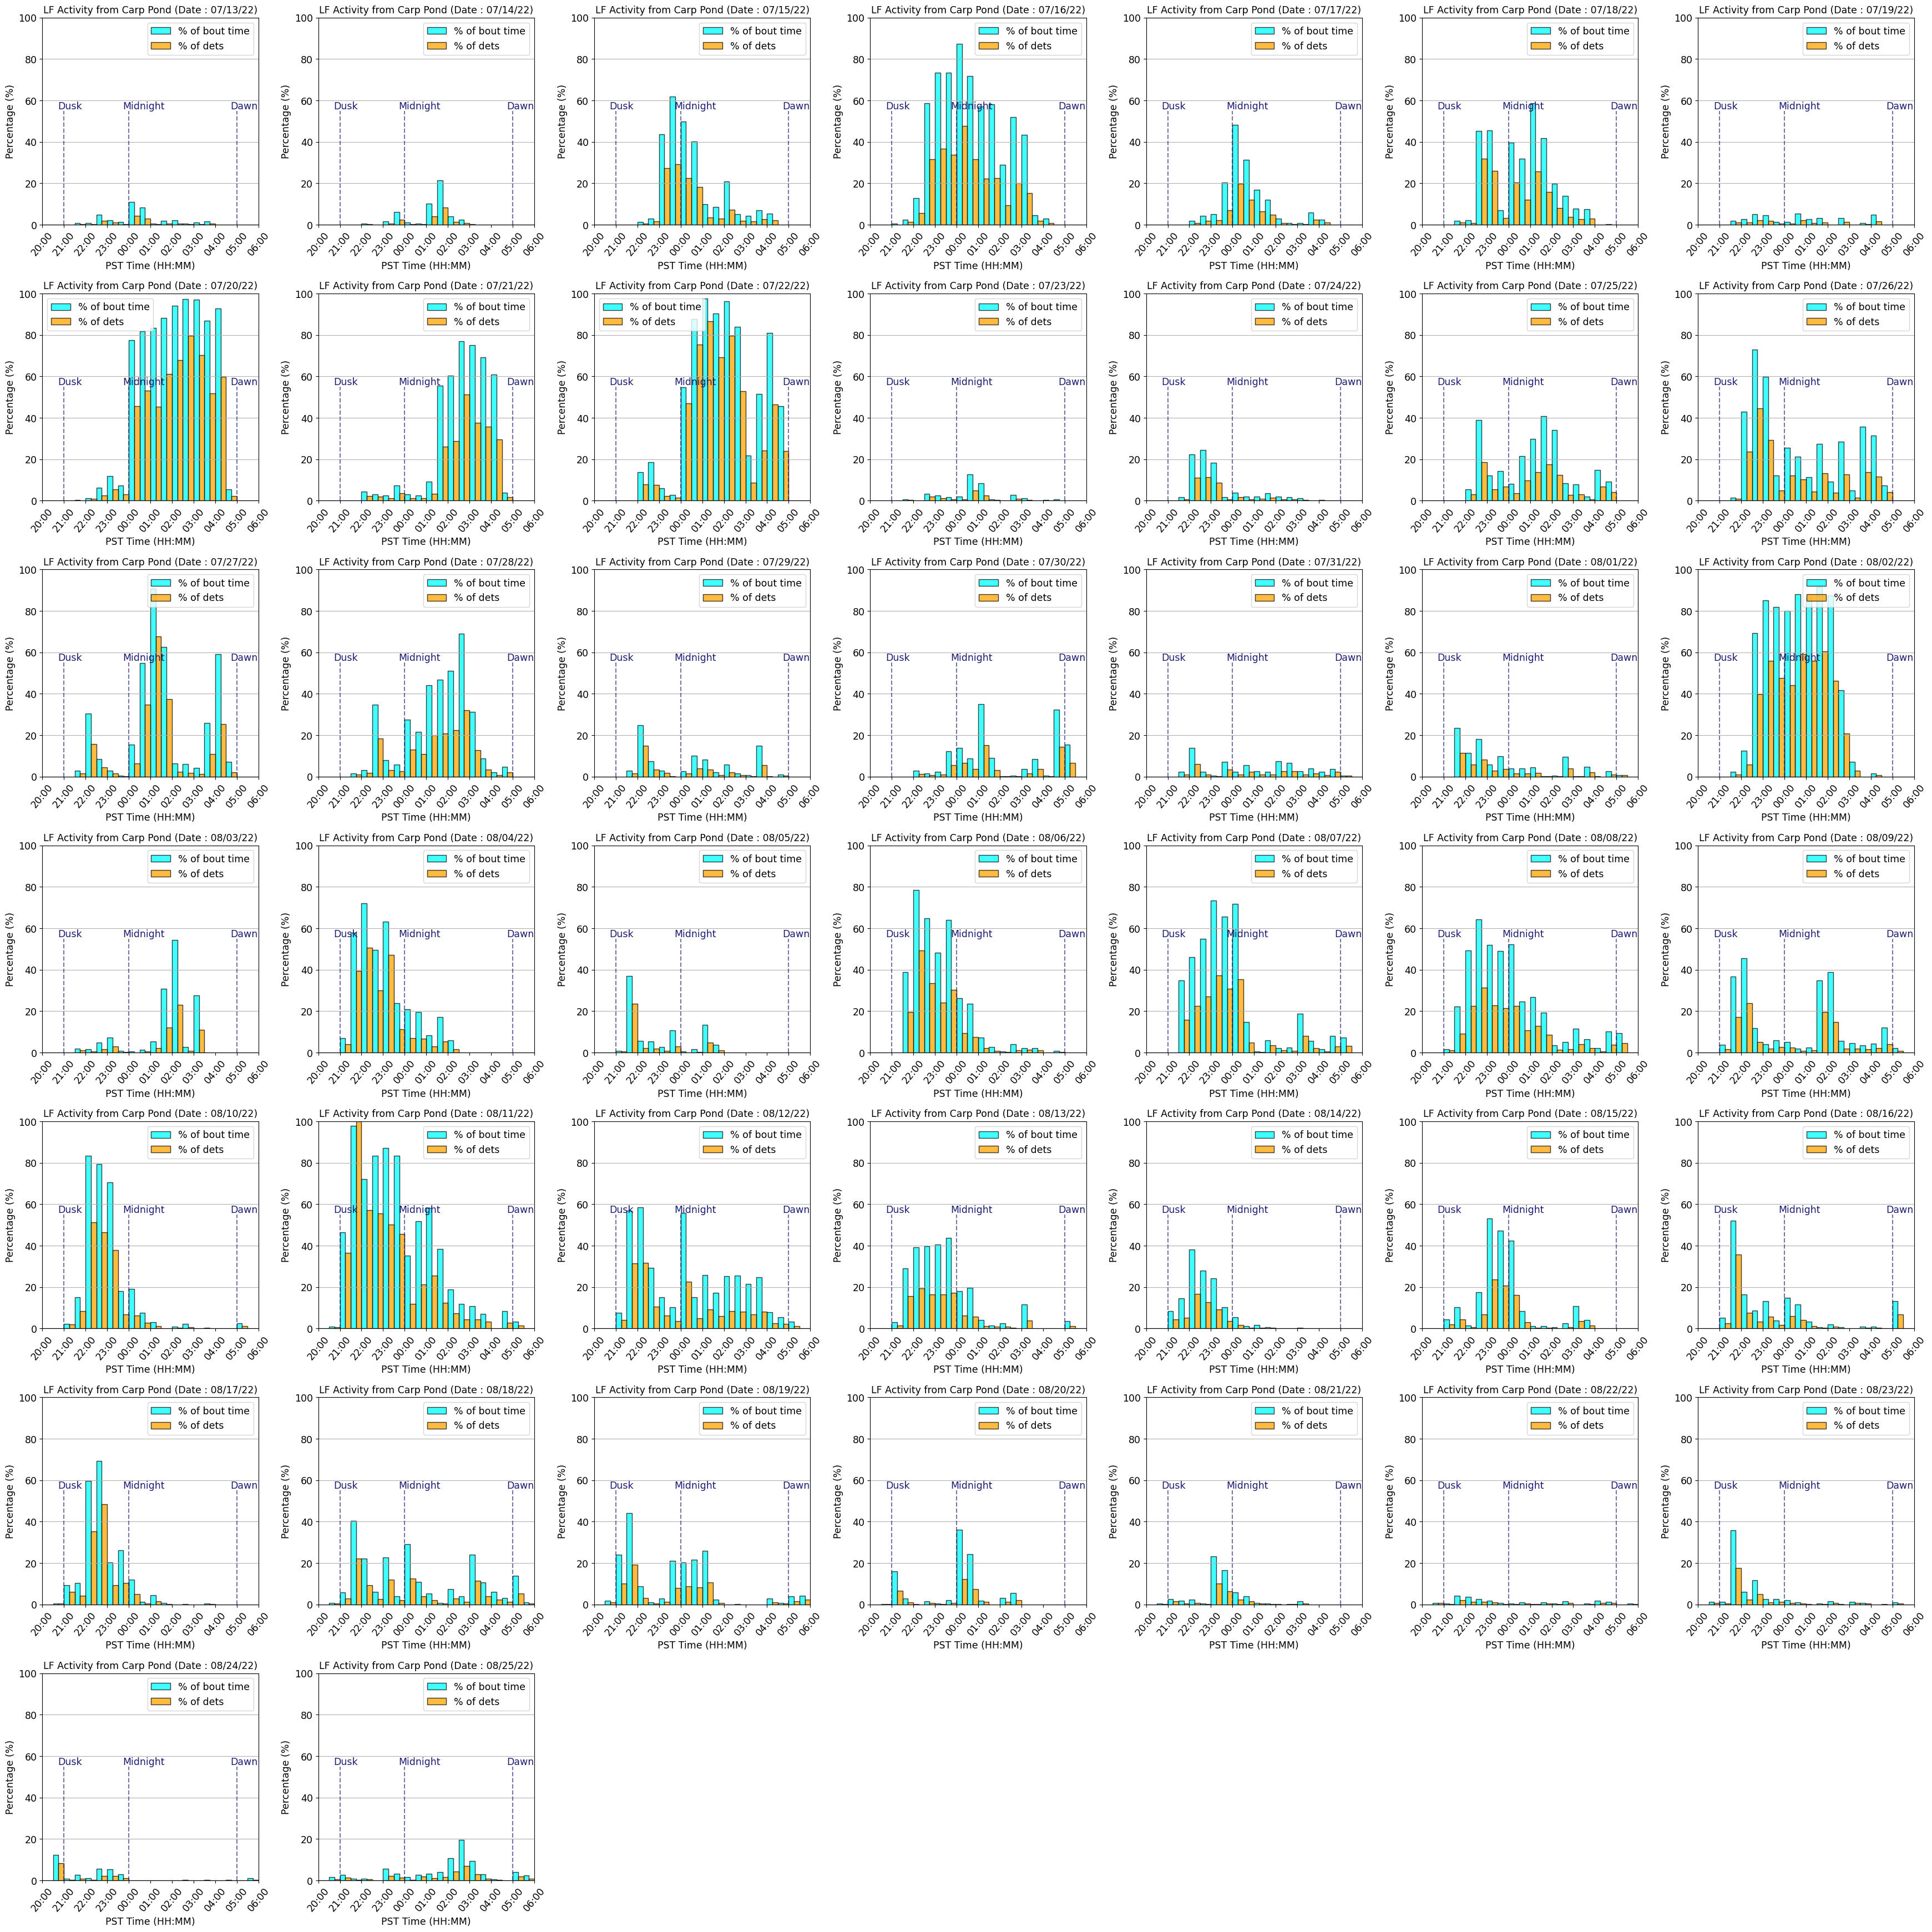

In [15]:
plotting.compare_metrics_per_night(activity_bouts_arr, activity_dets_arr, data_params, pipeline_params, file_paths)

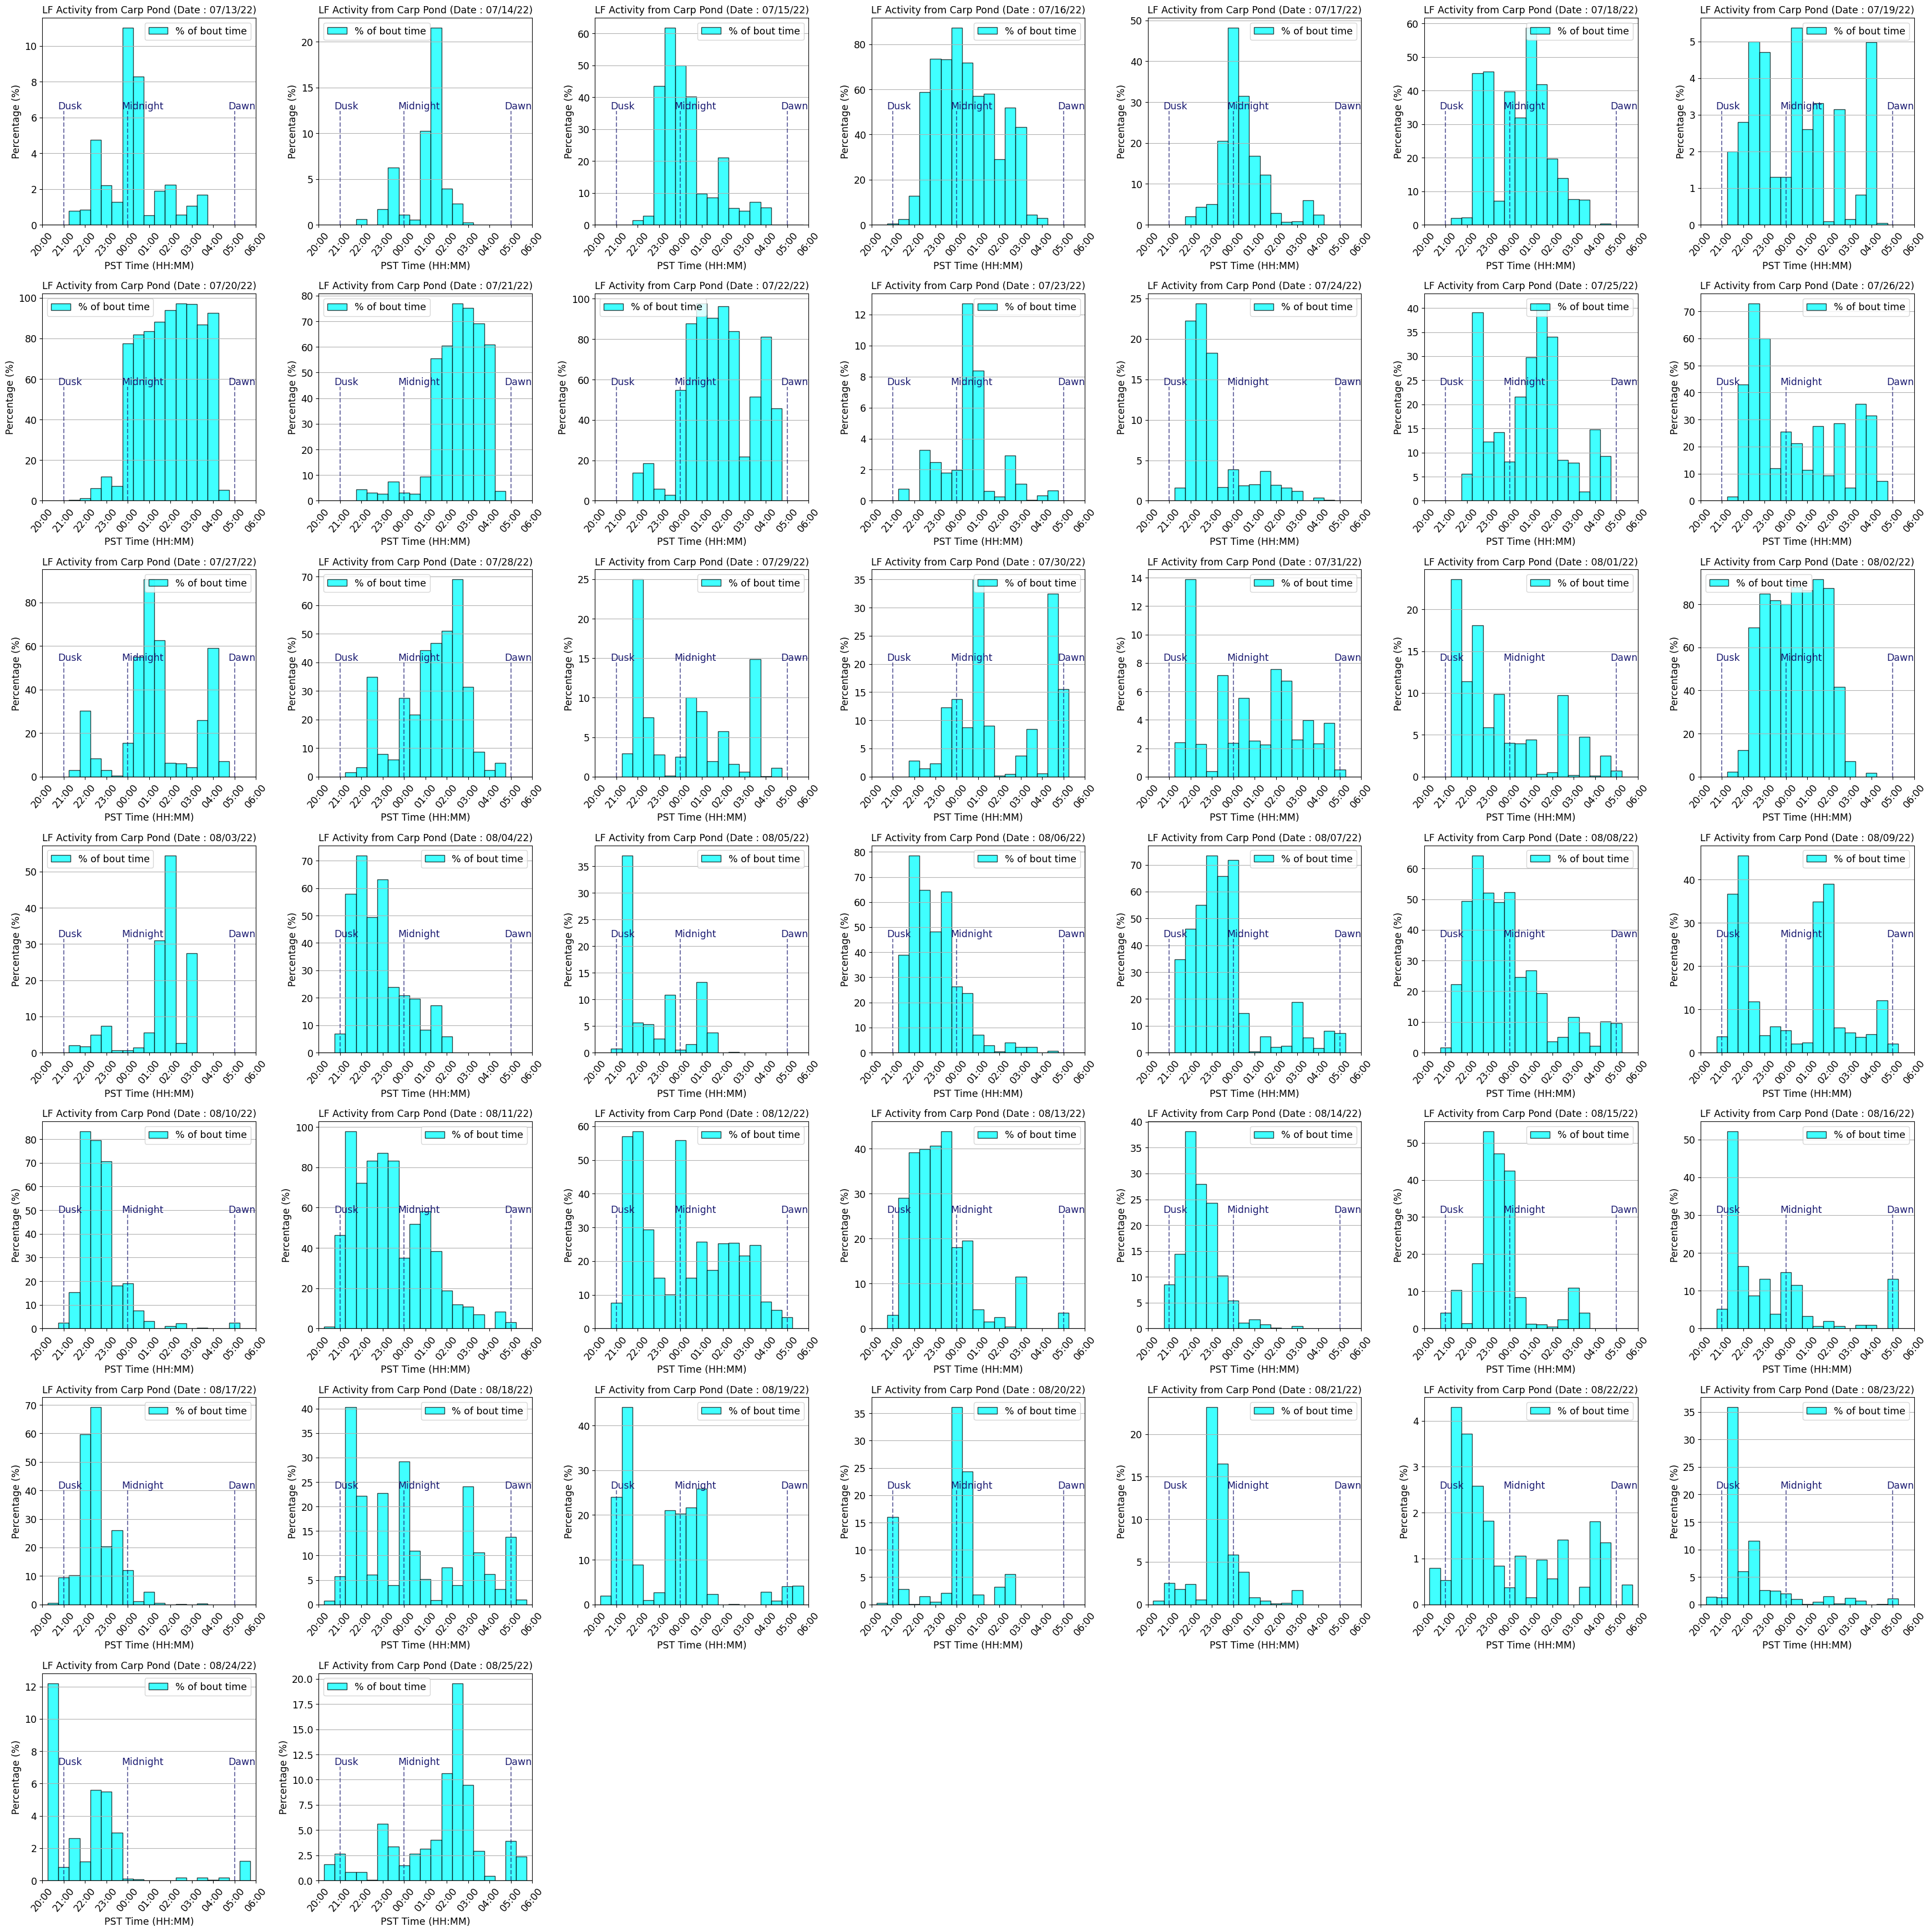

In [17]:
"""
Plots a bar graph for each date comparing all duty-cycling schemes provided in a given location.
"""

datetimes = pd.to_datetime(activity_bouts_arr.index.values)
dates = datetimes.strftime("%m/%d/%y").unique()
times = datetimes.strftime("%H:%M").unique()

activity_times = pd.DatetimeIndex(times).tz_localize('UTC')
xlabel = 'UTC'
if pipeline_params["show_PST"]:
    activity_times = activity_times.tz_convert(tz='US/Pacific')
    xlabel = 'PST'
plot_times = activity_times.strftime("%H:%M").unique()

plt.rcParams.update({'font.size': 12.5})
plt.figure(figsize=(5*int(np.ceil(np.sqrt(len(dates)))),5*int(np.ceil(np.sqrt(len(dates))))))

for i, date in enumerate(dates):
    plt.subplot(int(np.ceil(np.sqrt(len(dates)))), int(np.ceil(np.sqrt(len(dates)))), i+1)
    plt.title(f"{data_params['type_tag'].upper()[:2]} Activity from {data_params['site_name']} (Date : {date})", fontsize=12.5)
    dc_tag = data_params['cur_dc_tag']

    activity_bouts_df = dh.construct_activity_grid_for_bouts(activity_bouts_arr, dc_tag)
    on = int(dc_tag.split('of')[0])
    total = int(dc_tag.split('of')[1])
    recover_ratio = total / on
    bouts_of_date = (recover_ratio*activity_bouts_df[date])
    j=0
    bar_width = 1
    plt.bar(np.arange(0, len(activity_bouts_df.index))+(bar_width*(j - 0.5)), height=bouts_of_date, width=bar_width, 
            color='cyan', label=f'% of bout time', alpha=0.75, edgecolor='k')
    
    plt.grid(axis="y")
    plt.xticks(np.arange(0, len(activity_bouts_df.index), 2)-0.5, plot_times[::2], rotation=50)
    plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])
    plt.ylabel(f'Percentage (%)')
    plt.xlabel(f'{xlabel} Time (HH:MM)')
    plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(7.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(17.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    ax = plt.gca()
    plt.text(x=(1.5/21), y=0.56, s="Dusk", color='midnightblue', transform=ax.transAxes)
    plt.text(x=7.8/21,  y=0.56, s="Midnight", color='midnightblue', transform=ax.transAxes)
    plt.text(x=(18.3/21),  y=0.56, s="Dawn", color='midnightblue', transform=ax.transAxes)
    plt.legend()

plt.tight_layout()
if pipeline_params["save_dc_night_comparisons"]:
    plt.savefig(f'{file_paths["figures_SITE_folder"]}/{file_paths["dc_metric_comparisons_figname"]}.png', bbox_inches='tight')
if pipeline_params["show_plots"]:
    plt.show()

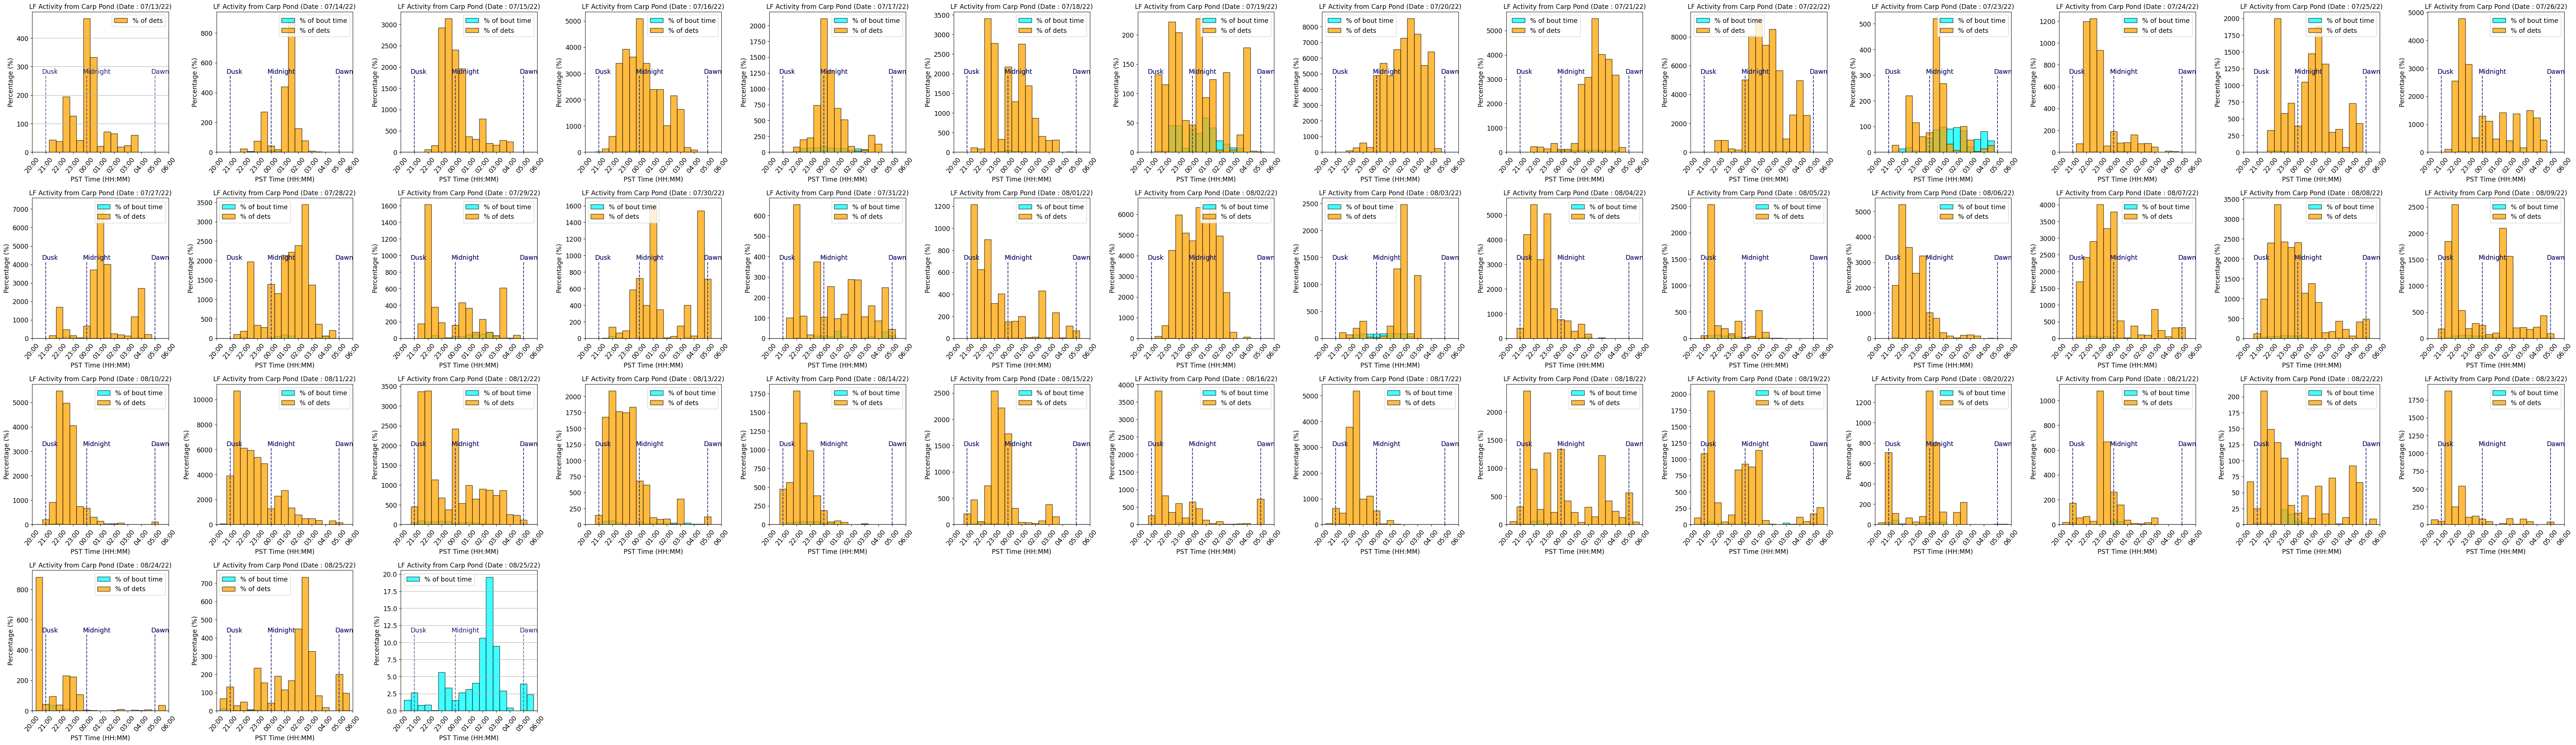

In [22]:
"""
Plots a bar graph for each date comparing all duty-cycling schemes provided in a given location.
"""

datetimes = pd.to_datetime(activity_dets_arr.index.values)
dates = datetimes.strftime("%m/%d/%y").unique()
times = datetimes.strftime("%H:%M").unique()

activity_times = pd.DatetimeIndex(times).tz_localize('UTC')
xlabel = 'UTC'
if pipeline_params["show_PST"]:
    activity_times = activity_times.tz_convert(tz='US/Pacific')
    xlabel = 'PST'
plot_times = activity_times.strftime("%H:%M").unique()

plt.rcParams.update({'font.size': 12.5})
plt.figure(figsize=(10*int(np.ceil(np.sqrt(len(dates)))),10*int(np.ceil(np.sqrt(len(dates))))))

for i, date in enumerate(dates):
    plt.subplot(2*int(np.ceil(np.sqrt(len(dates)))), 2*int(np.ceil(np.sqrt(len(dates)))), i+1)
    plt.title(f"{data_params['type_tag'].upper()[:2]} Activity from {data_params['site_name']} (Date : {date})", fontsize=12.5)
    dc_tag = data_params['cur_dc_tag']

    activity_dets_df = dh.construct_activity_grid_for_number_of_dets(activity_dets_arr, dc_tag)
    on = int(dc_tag.split('of')[0])
    total = int(dc_tag.split('of')[1])
    recover_ratio = total / on
    detections_of_date = recover_ratio*activity_dets_df[date]
    normalized_detections_of_date = (100*(detections_of_date / (activity_dets_arr.max()[0])))

    j=0
    bar_width = 1
    plt.bar(np.arange(0, len(activity_dets_df.index))+(bar_width*(j - 0.5)), height=detections_of_date, width=bar_width, 
            color='orange', label=f'% of dets', alpha=0.75, edgecolor='k')
    
    plt.grid(axis="y")
    plt.xticks(np.arange(0, len(activity_dets_df.index), 2)-0.5, plot_times[::2], rotation=50)
    plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])
    plt.ylabel(f'Percentage (%)')
    plt.xlabel(f'{xlabel} Time (HH:MM)')
    plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(7.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(17.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    ax = plt.gca()
    plt.text(x=(1.5/21), y=0.56, s="Dusk", color='midnightblue', transform=ax.transAxes)
    plt.text(x=7.8/21,  y=0.56, s="Midnight", color='midnightblue', transform=ax.transAxes)
    plt.text(x=(18.3/21),  y=0.56, s="Dawn", color='midnightblue', transform=ax.transAxes)
    plt.legend()


    plt.subplot(2*int(np.ceil(np.sqrt(len(dates)))), 2*int(np.ceil(np.sqrt(len(dates)))), i+2)
    plt.title(f"{data_params['type_tag'].upper()[:2]} Activity from {data_params['site_name']} (Date : {date})", fontsize=12.5)
    dc_tag = data_params['cur_dc_tag']

    activity_bouts_df = dh.construct_activity_grid_for_bouts(activity_bouts_arr, dc_tag)
    on = int(dc_tag.split('of')[0])
    total = int(dc_tag.split('of')[1])
    recover_ratio = total / on
    bouts_of_date = (recover_ratio*activity_bouts_df[date])
    j=0
    bar_width = 1
    plt.bar(np.arange(0, len(activity_bouts_df.index))+(bar_width*(j - 0.5)), height=bouts_of_date, width=bar_width, 
            color='cyan', label=f'% of bout time', alpha=0.75, edgecolor='k')
    
    plt.grid(axis="y")
    plt.xticks(np.arange(0, len(activity_bouts_df.index), 2)-0.5, plot_times[::2], rotation=50)
    plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])
    plt.ylabel(f'Percentage (%)')
    plt.xlabel(f'{xlabel} Time (HH:MM)')
    plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(7.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(17.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    ax = plt.gca()
    plt.text(x=(1.5/21), y=0.56, s="Dusk", color='midnightblue', transform=ax.transAxes)
    plt.text(x=7.8/21,  y=0.56, s="Midnight", color='midnightblue', transform=ax.transAxes)
    plt.text(x=(18.3/21),  y=0.56, s="Dawn", color='midnightblue', transform=ax.transAxes)
    plt.legend()

plt.tight_layout()
if pipeline_params["save_dc_night_comparisons"]:
    plt.savefig(f'{file_paths["figures_SITE_folder"]}/{file_paths["dc_metric_comparisons_figname"]}.png', bbox_inches='tight')
if pipeline_params["show_plots"]:
    plt.show()

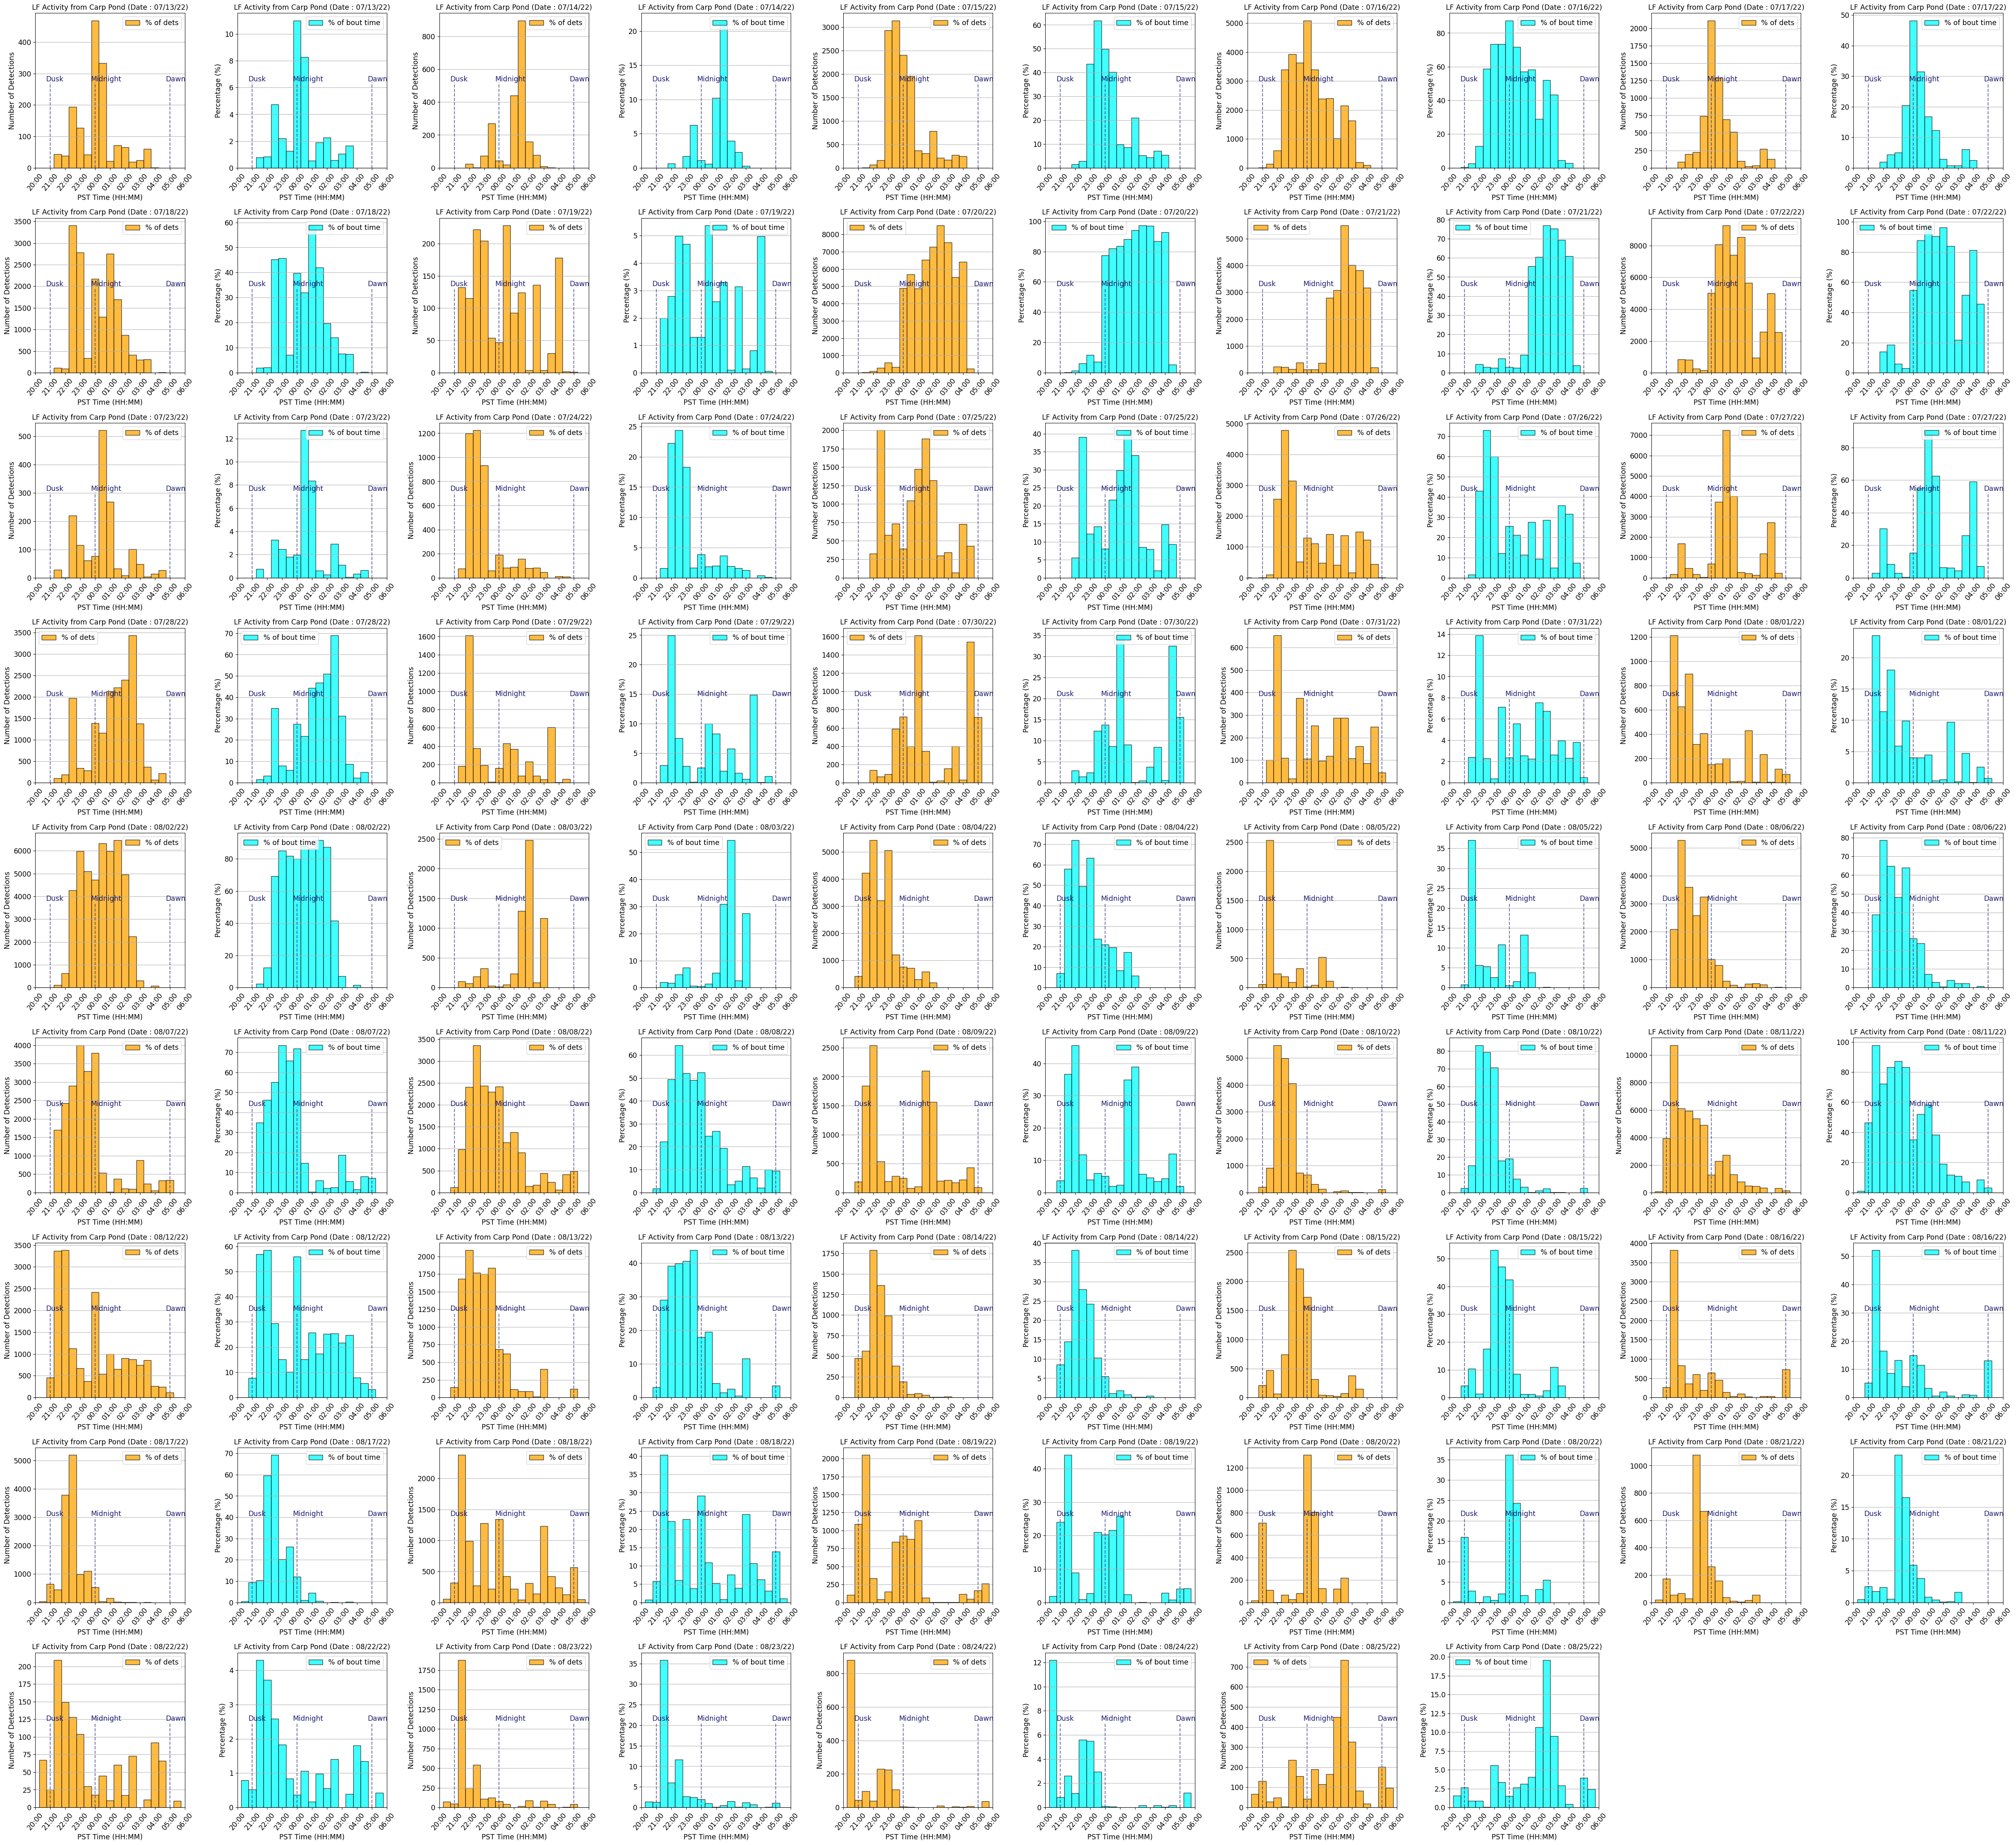

In [38]:
"""
Plots a bar graph for each date comparing all duty-cycling schemes provided in a given location.
"""

datetimes = pd.to_datetime(activity_dets_arr.index.values)
dates = datetimes.strftime("%m/%d/%y").unique()
times = datetimes.strftime("%H:%M").unique()

activity_times = pd.DatetimeIndex(times).tz_localize('UTC')
xlabel = 'UTC'
if pipeline_params["show_PST"]:
    activity_times = activity_times.tz_convert(tz='US/Pacific')
    xlabel = 'PST'
plot_times = activity_times.strftime("%H:%M").unique()

plt.rcParams.update({'font.size': 12.5})

plt.figure(figsize=(5*int(np.ceil(np.sqrt(2*len(dates)))),5*int(np.ceil(np.sqrt(2*len(dates))))))

i = 0
for date in dates:
    plt.subplot(int(np.ceil(np.sqrt(2*len(dates)))), int(np.ceil(np.sqrt(2*len(dates)))), i+1)
    plt.title(f"{data_params['type_tag'].upper()[:2]} Activity from {data_params['site_name']} (Date : {date})", fontsize=12.5)
    dc_tag = data_params['cur_dc_tag']

    activity_dets_df = dh.construct_activity_grid_for_number_of_dets(activity_dets_arr, dc_tag)
    on = int(dc_tag.split('of')[0])
    total = int(dc_tag.split('of')[1])
    recover_ratio = total / on
    detections_of_date = recover_ratio*activity_dets_df[date]
    normalized_detections_of_date = (100*(detections_of_date / (activity_dets_arr.max()[0])))

    j=0
    bar_width = 1
    plt.bar(np.arange(0, len(activity_dets_df.index))+(bar_width*(j - 0.5)), height=detections_of_date, width=bar_width, 
            color='orange', label=f'% of dets', alpha=0.75, edgecolor='k')

    plt.grid(axis="y")
    plt.xticks(np.arange(0, len(activity_dets_df.index), 2)-0.5, plot_times[::2], rotation=50)
    plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])
    plt.ylabel('Number of Detections')
    plt.xlabel(f'{xlabel} Time (HH:MM)')
    plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(7.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(17.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    ax = plt.gca()
    plt.text(x=(1.5/21), y=0.56, s="Dusk", color='midnightblue', transform=ax.transAxes)
    plt.text(x=7.8/21,  y=0.56, s="Midnight", color='midnightblue', transform=ax.transAxes)
    plt.text(x=(18.3/21),  y=0.56, s="Dawn", color='midnightblue', transform=ax.transAxes)
    plt.legend()


    plt.subplot(int(np.ceil(np.sqrt(2*len(dates)))), int(np.ceil(np.sqrt(2*len(dates)))), i+2)
    plt.title(f"{data_params['type_tag'].upper()[:2]} Activity from {data_params['site_name']} (Date : {date})", fontsize=12.5)
    dc_tag = data_params['cur_dc_tag']

    activity_bouts_df = dh.construct_activity_grid_for_bouts(activity_bouts_arr, dc_tag)
    on = int(dc_tag.split('of')[0])
    total = int(dc_tag.split('of')[1])
    recover_ratio = total / on
    bouts_of_date = (recover_ratio*activity_bouts_df[date])
    j=0
    bar_width = 1
    plt.bar(np.arange(0, len(activity_bouts_df.index))+(bar_width*(j - 0.5)), height=bouts_of_date, width=bar_width, 
            color='cyan', label=f'% of bout time', alpha=0.75, edgecolor='k')

    plt.grid(axis="y")
    plt.xticks(np.arange(0, len(activity_bouts_df.index), 2)-0.5, plot_times[::2], rotation=50)
    plt.xlim(plt.xticks()[0][0], plt.xticks()[0][-1])
    plt.ylabel(f'Percentage (%)')
    plt.xlabel(f'{xlabel} Time (HH:MM)')
    plt.axvline(1.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(7.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    plt.axvline(17.5, ymax=0.55, linestyle='dashed', color='midnightblue', alpha=0.6)
    ax = plt.gca()
    plt.text(x=(1.5/21), y=0.56, s="Dusk", color='midnightblue', transform=ax.transAxes)
    plt.text(x=7.8/21,  y=0.56, s="Midnight", color='midnightblue', transform=ax.transAxes)
    plt.text(x=(18.3/21),  y=0.56, s="Dawn", color='midnightblue', transform=ax.transAxes)
    plt.legend()
    i+=2

plt.tight_layout()
if pipeline_params["save_dc_night_comparisons"]:
    plt.savefig(f'{file_paths["figures_SITE_folder"]}/{file_paths["dc_metric_comparisons_figname"]}.png', bbox_inches='tight')
if pipeline_params["show_plots"]:
    plt.show()